Import libraries -- may need to revisit to remove unused ones

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df=pd.read_csv("autos.csv",  encoding='cp1252'  )

df.head()
df.columns


Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

<div class="span4 alert alert-success">
** QUESTION HERE***


HERE I read the file. But when I work on the DF manupulation sometimes I make a mistake, and as we all know creating duplicate dfs don't work because if you change one all will change.

What do you recommend here? How do I back-up? Do I go all the way to the beginning? Do I write a csv file?

</div>

In [2]:
df[df.seller=="gewerblich"]

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
59155,2016-03-15 18:06:22,Verkaufe_mehrere_Fahrzeuge_zum_Verschrotten,gewerblich,Angebot,100,control,kombi,2000,manuell,0,megane,150000,8,benzin,renault,NaN,2016-03-15 00:00:00,0,65232,2016-04-06 17:15:37
149393,2016-03-22 09:54:43,Chevrolet_Matiz_1.Hd_TÜV11/2017,gewerblich,Angebot,1100,test,kleinwagen,2006,manuell,38,matiz,150000,10,benzin,chevrolet,nein,2016-03-22 00:00:00,0,7973,2016-04-05 21:15:48
186181,2016-03-14 15:58:22,BMW_2000_AUTOMATIK_H_ZULASSUNG,gewerblich,Angebot,6900,control,limousine,1967,automatik,101,andere,70000,8,benzin,bmw,nein,2016-03-14 00:00:00,0,73614,2016-04-05 19:45:06


In [3]:
df.model=df.model.str.upper()
df.name=df.name.str.upper()
df.brand=df.brand.str.upper()
df[(df.brand=="SONSTIGE_AUTOS")&(df.model.isna()==False)]
df.name=df.name.str.replace("_", " ")
df.seller.unique()
df.seller[df.seller=="privat"] = "private"
df.seller[df.seller=="gewerblich"] = "dealer"


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<div class="span4 alert alert-success">
** QUESTION HERE***


HERE I read the file. But when I work on the DF manupulation sometimes I make a mistake, and as we all know creating duplicate dfs don't work because if you change one all will change.

What do you recommend here? How do I back-up? Do I go all the way to the beginning? Do I write a csv file?

</div>

In [4]:
def namecol_list(nm,lst):
    results=[]
    #nm.split(" ")
    
    for row in nm:
        if "" in row:
            row.remove("")
     
        found=False
        for elmnt in row: 
           
                for brnd in lst:


                     if found!=True and brnd == elmnt: 
                        results.append(elmnt)

                        found=True
                        break
                        #break  #except:
                     else: 
                            if found==False and elmnt==row[-1] and brnd==lst[-1]: 
                               
                                results.append("NaN")
 
                                found=True
                                break
      
  
    return (results)


<div class="span4 alert alert-success">
Here filtering starts on top and bottom level.
Pretty easy to tell there will be no cars for 0 or "1 €", or under "100€" --- these are fake advertisements just to draw attention.
Also, there are ultra luxurious brands, and another filter was written to see and filter out cars that are not ultra luxurious but ultra pricey.

I am plannig to working on using str.split and isin method, which will look nicer. I don't know if it is really necessary.

</div>

In [5]:
#LEVEL 1
df=df.drop(columns=["offerType","postalCode","nrOfPictures","dateCreated","lastSeen"])






#df=df.drop(df[(df.brand =='SONSTIGE_AUTOS') & (df.model.isna() == True)].index)







df=df.drop(df[df.price==0].index)
df=df.drop(df[df.price==1].index)
df=df.drop(df[df.price<=100].index)
df=df.drop(df[df.price==2147483647].index)
search1=df[(df.brand.isin(["PORSCHE","FERRARI","MASERATI"])==False) &  (df.name.str.contains("FERRARI")==False)
          & (df.name.str.contains("MASERATI")==False) & (df.name.str.contains("PORSCHE")==False)
          & (df.price>=2000000)]
search1#### DİKKAT!!!
df=df.drop(search1.index)

search2=df[(df.brand.isin(["PORSCHE","FERRARI","MASERATI"])==False) &  (df.name.str.contains("FERRARI")==False)
          & (df.name.str.contains("MASERATI")==False) & (df.name.str.contains("PORSCHE")==False)
          & (df.name.str.contains("LAMBORGHINI")==False) & (df.name.str.contains("ASTON MARTIN")==False)
          & (df.name.str.contains("MUSEUM")==False) & (df.name.str.contains("JAGUAR")==False)
          & (df.name.str.contains("ROLLS ROYCE")==False)  & (df.name.str.contains("AMG")==False)
          &(df.name.str.contains("DETOMASO")==False) &(df.name.str.contains("BMW Z8")==False)
          &(df.name.str.contains("MCLAREN")==False)
          & (df.price>=200000) & (df.yearOfRegistration > 1980)]
search2 #### DİKKAT!!!
df=df.drop(search2.index)
search3=df[(df.brand.isin(["PORSCHE","FERRARI","MASERATI"])==False) &  (df.name.str.contains("FERRARI")==False)
          & (df.name.str.contains("MASERATI")==False) & (df.name.str.contains("PORSCHE")==False)
          & (df.name.str.contains("LAMBORGHINI")==False) & (df.name.str.contains("ASTON MARTIN")==False)
          & (df.name.str.contains("MUSEUM")==False) & (df.name.str.contains("JAGUAR")==False)
          & (df.name.str.contains("ROLLS ROYCE")==False)  & (df.name.str.contains("AMG")==False)
          &(df.name.str.contains("DETOMASO")==False) &(df.name.str.contains("BMW Z8")==False)
          &(df.name.str.contains("MCLAREN")==False)
          & (df.price>=100000) & (df.yearOfRegistration > 1980)]
search3#### DİKKAT!!!
df=df.drop(search3.index)



In [6]:
brands=df.brand.unique()
brands=pd.DataFrame(brands)
liste=list(brands[0].str.upper())


In [7]:
new_col = namecol_list(df.name.str.split(" "),liste)                              
#len(new_col)-df.name[df.name.isnull()==False].count()
#liste.append("BMW")
#new_col


<div class="span4 alert alert-success">

AFTER DECIDING THE NUMBER OF DATAPOINTS TRUNCATED WERE TOO MUCH, I CREATED AN AUGMENTED DICTIONARY OF BRANDS AND MODELS TO RETREIVE DATA FROM THE NAME COLUMN

</div>

In [8]:
df[df.brand=='SONSTIGE_AUTOS']
liste1=(["OLDSMOBILE", "DODGE", "LEXUS", "MG", "BUICK", "BENTLEY" , "TRIUMPH", "LINCOLN", "PROTON", "HUMMER",
         "CADILLAC", "LOTUS", 'FERRARI','MASERATI','GMC','PONTIAC','IVECO','ISUZU'])
#liste.remove(["OLDMOBILE", "DODGE", "LEXUS", "MG", "BUICK", "BENTLEY" , "TRIUMPH", "LINCOLN", "PROTON", "HUMMER"])
liste.extend(liste1)

In [9]:
extendedDict={
'OLDSMOBILE': ['ACHIEVA', 'ALERO', 'AURORA', 'CIERA', 'CUTLASS', 'CUTLASS SUPREME', 'DELTA EIGHTY-EIGHT',  'INTRIGUE', 'LSS', 'NINETY-EIGHT', 'REGENCY', 'SILHOUETTE', 'BRAVADA'],
'DODGE': ['CHALLENGER', 'DURANGO', 'CHARGER', 'GRAND CARAVAN', 'JOURNEY', 'CARAVAN', 'AVENGER', 'CALIBER', 'DAKOTA', 'DART', 'NITRO', 'RAM', 'SPRINTER'],
'LEXUS': ['ES', 'GS', 'GX', 'IS', 'LC', 'LS', 'LX', 'NX', 'RC', 'RX', 'UX', 'HS', 'LFA', 'SC'],
'MG':['3', 'ZS', '6', 'GS'],
'BUICK': ['CASCADA', 'ENCLAVE', 'ENCORE', 'ENVISION', 'LACROSSE', 'REGAL', 'LUCERNE', 'RAINIER', 'RENDEZVOUS', 'TERRAZA', 'VERANO'],
'BENTLEY':['CONTINENTAL', 'FLYING', 'MULSANNE', 'ARNAGE', 'AZURE', 'BROOKLANDS'],
'TRIUMPH': ['SUPER', 'ROADSTER', 'DOLOMITE'],
'LINCOLN': ['CONTINENTAL', 'MKC', 'MKT', 'MKX','MKZ', 'NAUTILUS', 'NAVIGATOR', 'MARK LT', 'MKS', 'TOWN CAR'],
'PROTON':['PERDANA', 'SAGA', 'SATRIA'],
'HUMMER': ['H1', 'H2', 'H3', 'H3T'],
'CADILLAC' : ['ATS',  'CT6', 'CTS' ,'ESCALADE' ,'XT5', 'XTS' ,'DTS' ,'SRX' ,'ELR' ,'STS' ,'XLR', 'XT4'],
'LOTUS': ['ELISE', 'ESPRIT', 'EXIGE'],
'FERRARI': ['MODENA', '360', '430', '456', '458', '458','550','575','599', '488', '612', 'CALIFORNIA', 'ENZO', 'F355','F430','FF','LAFERRARI','SUPERAMERICA', '812', 'PORTOFINO'],
'MASERATI': ['GHIBLI', 'GRANTURISMO', 'LEVANTE', 'QUATTROPORTE', 'GRANSPORT', 'SPYDER'],
'GMC': ['ACADIA', 'CANYON', 'SAVANA', 'SIERRA ', 'TERRAIN', 'YUKON', 'ENVOY'],
'PONTIAC': ['G3', 'SUNFIRE', 'VIBE', 'BONNEVILLE', 'G6', 'G8', 'GRAND AM', 'GRAND PRIX' ,'MONTANA', 'TRANSPORT', 'FIREBIRD', 'G5', 'GTO', 'SOLSTICE', 'AZTEK', 'TORRENT'],
'IVECO': ['DAILY', 'EUROCARGO', 'TRAKKER', 'STRALIS', 'STRALIS X-WAY', 'POWERSTAR', 'STRATOR', 'TECTOR'],
'ISUZU': ['OASIS','AMIGO', 'ASCENDER', 'AXIOM', 'HOMBRE''I-280','I-290','I-350','I-370', 'RODEO','TROOPER','VEHICROSS']}


CODE BELOW FILLS BRAND VALUE BY LOOKING AT NAME COLUMN IF BRAND IS "SONSTIGE AUTOS" 

In [10]:
def other_brands_look(row,list_name):
    mdlist=[]
    
    if row.brand == "SONSTIGE_AUTOS":
    
        for brnd in list_name:
        
            if brnd in list(row["name"].split(" ")):
                
                return brnd  

In [11]:
df["others"]=df.apply (lambda row: other_brands_look(row,liste),axis=1) 
df[(df.brand=='SONSTIGE_AUTOS')& (df.others.notnull()==True)]
df.others.fillna(value=df.brand, inplace=True)
df=df.drop(df[df.others=='SONSTIGE_AUTOS'].index)
df=df.drop(columns="brand")
df.rename(columns={"others":"brand"}, inplace=True)

In [12]:
grand_opt={'CHRYSLER':"GRAND VOYAGER", 'SUZUKI':"GRAND VITARA",'JEEP': "GRAND CHEROKEE"}
def lookupCode(code):
    return grand_opt.get(code)
df.model=df.model.str.upper()
df.brand=df.brand.str.upper()
df.name=df.name.str.upper()
#df.model[df1.model=="Grand"] = 
df.model[df.model=="GRAND"] = df.brand[df.model=="GRAND"].map(lookupCode)
#dftrim1.model[dftrim1.model=="GRAND"] = dftrim1.brand[df.model=="GRAND"].map(lookupCode)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:
models=df.model.unique()
models=pd.DataFrame(models)
models.sort_values(by=0)

#models=list(models[0])
models=models[0].str.upper()
#print(liste)
models=list(models.dropna())
models

['GOLF',
 'GRAND CHEROKEE',
 'FABIA',
 '3ER',
 '2_REIHE',
 'C_MAX',
 '3_REIHE',
 'PASSAT',
 'NAVARA',
 'KA',
 'POLO',
 'TWINGO',
 'A_KLASSE',
 'SCIROCCO',
 '5ER',
 'MERIVA',
 'AROSA',
 'ANDERE',
 'C4',
 'CIVIC',
 'TRANSPORTER',
 'PUNTO',
 'E_KLASSE',
 'CLIO',
 'KADETT',
 'KANGOO',
 'ONE',
 'FORTWO',
 '1ER',
 'B_KLASSE',
 'SIGNUM',
 'ASTRA',
 'A8',
 'JETTA',
 'FIESTA',
 'C_KLASSE',
 'MICRA',
 'VITO',
 'SPRINTER',
 '156',
 'ESCORT',
 'FORESTER',
 'XC_REIHE',
 'SCENIC',
 'A4',
 'A1',
 'INSIGNIA',
 'COMBO',
 'FOCUS',
 'TT',
 'CORSA',
 'A6',
 'JAZZ',
 'OMEGA',
 'SLK',
 '7ER',
 '80',
 '147',
 'GLK',
 '100',
 'Z_REIHE',
 'SPORTAGE',
 'SORENTO',
 'V40',
 'IBIZA',
 'MUSTANG',
 'EOS',
 'TOURAN',
 'GETZ',
 'A3',
 'ALMERA',
 'MEGANE',
 'LUPO',
 'R19',
 'ZAFIRA',
 'CADDY',
 'MONDEO',
 'CORDOBA',
 'COLT',
 'IMPREZA',
 'VECTRA',
 'BERLINGO',
 'M_KLASSE',
 'TIGUAN',
 'I_REIHE',
 'ESPACE',
 'SHARAN',
 '6_REIHE',
 'PANDA',
 'UP',
 'SEICENTO',
 'CEED',
 '5_REIHE',
 'YETI',
 'OCTAVIA',
 'MII',
 'RX_REIHE'

In [14]:
def colbrmdl(brands,models):
    out={}
    for mdl in  models:
        
        hits= df.brand[df.model==mdl].unique()
            
        for hit in hits:
            if mdl not in ["MISSING VALUE","ANDERE" ]:
            
            
            
          
                out.setdefault(hit, []).append(mdl) 
        
    return out


In [15]:
brandsmodels={}
brandsmodels=colbrmdl(brands,models)
brandsmodels


brandsmodels.update(extendedDict)
brandsmodels

{'VOLKSWAGEN': ['GOLF',
  'PASSAT',
  'POLO',
  'SCIROCCO',
  'TRANSPORTER',
  'JETTA',
  'EOS',
  'TOURAN',
  'LUPO',
  'CADDY',
  'TIGUAN',
  'SHARAN',
  'UP',
  'FOX',
  'BEETLE',
  'TOUAREG',
  'KAEFER',
  'PHAETON',
  'CC',
  'BORA',
  'AMAROK'],
 'JEEP': ['GRAND CHEROKEE', 'WRANGLER', 'CHEROKEE'],
 'SKODA': ['FABIA', 'YETI', 'OCTAVIA', 'ROOMSTER', 'SUPERB', 'CITIGO'],
 'BMW': ['3ER',
  '5ER',
  '1ER',
  '7ER',
  'Z_REIHE',
  '6ER',
  'X_REIHE',
  'M_REIHE',
  'I3'],
 'PEUGEOT': ['2_REIHE', '3_REIHE', '5_REIHE', '1_REIHE', '4_REIHE'],
 'FORD': ['C_MAX',
  'KA',
  'FIESTA',
  'ESCORT',
  'FOCUS',
  'MUSTANG',
  'MONDEO',
  'S_MAX',
  'GALAXY',
  'TRANSIT',
  'KUGA',
  'FUSION',
  'B_MAX'],
 'MAZDA': ['3_REIHE',
  '6_REIHE',
  '5_REIHE',
  'RX_REIHE',
  '1_REIHE',
  'MX_REIHE',
  'CX_REIHE'],
 'NISSAN': ['NAVARA',
  'MICRA',
  'ALMERA',
  'PRIMERA',
  'JUKE',
  'QASHQAI',
  'X_TRAIL',
  'NOTE'],
 'RENAULT': ['TWINGO',
  'CLIO',
  'KANGOO',
  'SCENIC',
  'MEGANE',
  'R19',
  'ESPACE'

In [16]:
def fill_value(row,lookupDict):
    mdlist=[]
    
    if row.model in ["MISSING VALUE","ANDERE"]:#== "MISSING VALUE" or row.model=="ANDERE":
    
        mdlist=lookupDict.get(row.brand)
   
        for mdl in mdlist:
            
            if mdl in list(row["name"].split(" ")):
                
                return mdl


In [17]:
df["model"]=df["model"].fillna("MISSING VALUE")
df["sonuc"]=df.apply (lambda row: fill_value(row,brandsmodels),axis=1)
df.sonuc[df.brand=="CADILLAC"].unique()
df.sonuc.fillna(value=df.model, inplace=True)
df=df.drop(columns="model")
df.rename(columns={"sonuc":"model"}, inplace=True)
df=df.drop(df[df.model=='MISSING VALUE'].index)
df=df.drop(df[df.model=='ANDERE'].index)

In [212]:
df[df.model=='CIVIC'].groupby("vehicleType").count()

##########CHECKPOINT 
##########CHECKPOINT HERE I MAKE A DEEPCOPY OF THE DATAFRAME AND WILL DISCARD NULL VALUES AND COMPARE COPY AND MASTER
##########CHECKPOINT 
##########CHECKPOINT 

#df1=df.copy(deep=True)

,dateCrawled,name,seller,price,abtest,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,notRepairedDamage,brand,model
vehicleType,,,,,,,,,,,,,,
andere,12,12,12,12,12,12,12,12,12,12,12,9,12,12
bus,1,1,1,1,1,1,1,1,1,1,1,0,1,1
cabrio,10,10,10,10,10,10,9,10,10,10,9,9,10,10
coupe,168,168,168,168,168,168,161,168,168,168,153,131,168,168
kleinwagen,240,240,240,240,240,240,236,240,240,240,218,179,240,240
kombi,36,36,36,36,36,36,35,36,36,36,34,31,36,36
limousine,664,664,664,664,664,664,653,664,664,664,645,587,664,664


In [19]:
df[df.vehicleType.isna()==True]


,dateCrawled,name,seller,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,notRepairedDamage,brand,model
0,2016-03-24 11:52:17,GOLF 3 1.6,private,480,test,NaN,1993,manuell,0,150000,0,benzin,NaN,VOLKSWAGEN,GOLF
16,2016-04-01 12:46:46,POLO 6N 1 4,private,300,test,NaN,2016,NaN,60,150000,0,benzin,NaN,VOLKSWAGEN,POLO
22,2016-03-23 14:52:51,OPEL MERIVA 1.HAND TÜV 3.2018,private,2900,test,NaN,2018,manuell,90,150000,5,benzin,nein,OPEL,MERIVA
26,2016-03-10 19:38:18,CITROEN C4 GRAND PICASSO.,private,5555,control,NaN,2017,manuell,125,125000,4,NaN,nein,CITROEN,C4
31,2016-03-29 16:57:02,RENAULT CLIO 1.2 TÜV 07/2016,private,899,control,NaN,2016,manuell,60,150000,6,benzin,NaN,RENAULT,CLIO
35,2016-03-08 07:54:46,VW GOLF 3,private,350,test,NaN,2016,manuell,75,150000,4,benzin,nein,VOLKSWAGEN,GOLF
37,2016-03-28 17:50:15,RENAULT KANGOO 1.9 DIESEL,private,1500,test,NaN,2016,NaN,0,150000,1,diesel,nein,RENAULT,KANGOO
48,2016-03-25 14:40:12,VW GOLF 6 KLIMA ALU SCHECKHEFT !!!,private,7750,control,NaN,2017,manuell,80,100000,1,benzin,NaN,VOLKSWAGEN,GOLF
51,2016-03-07 18:57:08,FIAT PUNTO 5 TUERER 6 GANG,private,2000,control,NaN,2017,manuell,90,150000,11,diesel,ja,FIAT,PUNTO
66,2016-03-28 17:41:27,OPEL ASTRA 1.4 MIT VIELEN EXTRAS!!!!,private,10900,test,NaN,2017,manuell,101,50000,3,NaN,nein,OPEL,ASTRA


In [20]:
df1['dateCrawled']=pd.to_datetime(df1.dateCrawled)
#df["age"]=np.round(((pd.datetime.today()-df.yearOfRegistration.iloc[1]).days-df.monthOfRegistration*30)/365 ,2)

In [21]:
df1=df1.drop(df1[df1.yearOfRegistration<1950].index)
df1=df1.drop( df1[(df1.yearOfRegistration>df1.dateCrawled.max().year)].index)  ## fake dates, a car can not be 2018 model in 2016
df1=df1.drop(df1[(df1.yearOfRegistration==df1.dateCrawled.max().year) & (df1.monthOfRegistration>df1.dateCrawled.max().month)].index)
df1=df1.dropna()
df1[df1.price>1000*1000]
df1=df1.drop(df1[df1.price==df1.price.max()].index)
df1[df1.powerPS>801].sort_values(by='price',ascending=False)
df1=df1.drop(df1[df1.powerPS>801].index)
df1=df1.drop(df1[df1.fuelType=='elektro'][df1.powerPS>000][df1.model!="FORTWO"][df1.model!="I3"][df1.powerPS>000].index)


In [22]:
df1=df1.drop(df1[df1.powerPS<1].index)
df1=df1.drop(df1[df1.powerPS<10].index)
df1=df1.drop(df1[(df1.powerPS<30)&(df1.yearOfRegistration>1980)&(df1.brand!="TRABANT")].index)
df1.monthOfRegistration.max()
df1=df1.drop(df1[df1.price<200].index)

In [133]:
df1[df1.price==500].sort_values(by="yearOfRegistration", ascending=False)
#df1=df1.drop(df1[df1.price<200].index)

,dateCrawled,name,seller,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,salvaged,brand,model,age
111241,2016-04-06 14:06:25,RENAULT MEGANE 1.5 DCI,private,500,test,limousine,2005,manuell,82,150000,2,diesel,yes,RENAULT,MEGANE,14.00
217178,2016-03-14 16:59:05,KIA CARNIVAL CRDI LX ZUM TEILE VERKAUFEN,private,500,test,bus,2005,manuell,144,150000,1,diesel,yes,KIA,CARNIVAL,13.92
82299,2016-03-05 19:55:46,GAR NICHT MAL SO SCHOEN...,private,500,test,kleinwagen,2005,manuell,65,150000,6,benzin,yes,KIA,PICANTO,14.33
15450,2016-03-06 10:06:24,FORD MONDEO 2.0 TURNIER TDCI AMBIENTE,private,500,control,kombi,2005,manuell,116,150000,9,diesel,yes,FORD,MONDEO,14.58
369754,2016-03-31 12:38:32,VW POLO 9N UNFALLWAGEN,private,500,test,kleinwagen,2005,manuell,60,125000,8,benzin,yes,VOLKSWAGEN,POLO,14.50
176150,2016-03-21 19:54:48,AUTO TÜV 11. 2016,private,500,test,kleinwagen,2005,manuell,54,150000,1,benzin,no,CHEVROLET,MATIZ,13.92
231731,2016-03-24 19:52:13,CHEVROLET MATIZ 1.0 SE EURO 3 WENIG KILOMETE...,private,500,control,kleinwagen,2005,manuell,64,90000,2,benzin,no,CHEVROLET,MATIZ,14.00
27976,2016-03-19 16:39:56,FIAT PUNTO 1.2 8V,private,500,test,kleinwagen,2005,manuell,60,150000,3,benzin,yes,FIAT,PUNTO,14.08
96515,2016-03-23 13:50:17,RENAULT TWINGO 1.2 PLUS,private,500,test,kleinwagen,2005,manuell,58,150000,2,benzin,yes,RENAULT,TWINGO,14.00
271275,2016-03-31 14:53:53,FIAT DUCATO ERDGAS+BENZIN MOTOR SCHADEN ABE...,private,500,control,bus,2005,manuell,100,100000,10,hybrid,yes,FIAT,DUCATO,14.67


In [134]:
df1=df1.drop(df1[(df1.price<1000)&(df1.yearOfRegistration>2008)].index)
df1=df1.drop(df1[(df1.price<1000)&(df1.yearOfRegistration>2005)].index)
df=df.drop(df.loc[df.price>=1.9*1e6].index)

df1.rename(columns={"accidentFree":"salvaged"}, inplace=True)
df1.accidentFree[df1.accidentFree=="nein"] = "no"
df1.accidentFree[df1.accidentFree=="ja"] = "yes"
df1=df1.drop(df1[(df.yearOfRegistration>1960)&(df1.yearOfRegistration<1969)&(df1.brand=='FIAT')&(df1.powerPS>200)].index)
df1.reset_index(inplace=True)

AttributeError: 'DataFrame' object has no attribute 'accidentFree'

In [24]:
#df2=df1.copy(deep=True)
#df1.reset_index(inplace=True)
#df1=df1.drop(columns="index")
df1

,dateCrawled,name,seller,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,accidentFree,brand,model
1,2016-03-24 10:58:45,A5 SPORTBACK 2.7 TDI,private,18300,test,coupe,2011,manuell,190,125000,5,diesel,yes,AUDI,A5
3,2016-03-17 16:54:04,GOLF 4 1 4 3TÜRER,private,1500,test,kleinwagen,2001,manuell,75,150000,6,benzin,no,VOLKSWAGEN,GOLF
4,2016-03-31 17:25:20,SKODA FABIA 1.4 TDI PD CLASSIC,private,3600,test,kleinwagen,2008,manuell,69,90000,7,diesel,no,SKODA,FABIA
5,2016-04-04 17:36:23,BMW 316I E36 LIMOUSINE BASTLERFAHRZEUG EX...,private,650,test,limousine,1995,manuell,102,150000,10,benzin,yes,BMW,3ER
6,2016-04-01 20:48:51,PEUGEOT 206 CC 110 PLATINUM,private,2200,test,cabrio,2004,manuell,109,150000,8,benzin,no,PEUGEOT,2_REIHE
10,2016-03-26 19:54:18,MAZDA 3 1.6 SPORT,private,2000,control,limousine,2004,manuell,105,150000,12,benzin,no,MAZDA,3_REIHE
11,2016-04-07 10:06:22,VOLKSWAGEN PASSAT VARIANT 2.0 TDI COMFORTLINE,private,2799,control,kombi,2005,manuell,140,150000,12,diesel,yes,VOLKSWAGEN,PASSAT
14,2016-03-21 12:57:01,NISSAN NAVARA 2.5DPF SE4X4 KLIMA SITZHEIZG BLU...,private,17999,control,suv,2011,manuell,190,70000,3,diesel,no,NISSAN,NAVARA
17,2016-03-20 10:25:19,RENAULT TWINGO 1.2 16V AUT.,private,1750,control,kleinwagen,2004,automatik,75,150000,2,benzin,no,RENAULT,TWINGO
18,2016-03-23 15:48:05,FORD C MAX 2.0 TDCI DPF TITANIUM,private,7550,test,bus,2007,manuell,136,150000,6,diesel,no,FORD,C_MAX


In [36]:
def calculateAge(row,date):
    
    
    delta_year=date.year-row.yearOfRegistration
    
    delta_month=date.month-row.monthOfRegistration
   
    
                
    return np.round((delta_year-delta_month/12),2)
df1["age"]=df1.apply (lambda row: calculateAge(row,pd.datetime.today()),axis=1) 

**** CAUTION HERE*****


<div class="span4 alert alert-success">
Here the top filtering ends, but are these the results I want?
I cleaned all fake data, but there are outliers still....Do I want them?
</div>

In [25]:
df.shape
df.columns
print(df.info())
print(df['vehicleType'].value_counts(dropna=False))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323592 entries, 0 to 371527
Data columns (total 15 columns):
dateCrawled            323592 non-null object
name                   323592 non-null object
seller                 323592 non-null object
price                  323592 non-null int64
abtest                 323592 non-null object
vehicleType            295448 non-null object
yearOfRegistration     323592 non-null int64
gearbox                310096 non-null object
powerPS                323592 non-null int64
kilometer              323592 non-null int64
monthOfRegistration    323592 non-null int64
fuelType               299887 non-null object
notRepairedDamage      266628 non-null object
brand                  323592 non-null object
model                  323592 non-null object
dtypes: int64(5), object(10)
memory usage: 39.5+ MB
None
limousine     86173
kleinwagen    73156
kombi         62690
NaN           28144
bus           25237
cabrio        20186
coupe         14210
suv    

In [140]:
df1.loc[df.price==df.price.max()]

,dateCrawled,name,seller,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,salvaged,brand,model,age
20143,2016-03-18 00:55:53,PORSCHE 911R EINER VON 911,private,1250000,test,coupe,2016,manuell,500,5000,3,benzin,no,PORSCHE,911,3.08
78480,2016-03-10 20:43:12,PORSCHE 991 R,private,1250000,test,coupe,2016,manuell,500,5000,3,benzin,no,PORSCHE,911,3.08


(array([ 645.,  109.,  685.,   56.,  265.,  863.,   88.,  871.,   68.,
         357.,  794.,   51.,  786.,   42.,  367., 2800.,   68., 1433.,
          68.,  730., 1886.,   65., 1645.,  101.,  799., 1375.,   57.,
        1729.,  116.,  878., 1880.,   58., 1636.,   53.,  997., 1449.,
          41., 1607.,   65., 2772.]),
 array([200.   , 219.975, 239.95 , 259.925, 279.9  , 299.875, 319.85 ,
        339.825, 359.8  , 379.775, 399.75 , 419.725, 439.7  , 459.675,
        479.65 , 499.625, 519.6  , 539.575, 559.55 , 579.525, 599.5  ,
        619.475, 639.45 , 659.425, 679.4  , 699.375, 719.35 , 739.325,
        759.3  , 779.275, 799.25 , 819.225, 839.2  , 859.175, 879.15 ,
        899.125, 919.1  , 939.075, 959.05 , 979.025, 999.   ]),
 <a list of 40 Patch objects>)

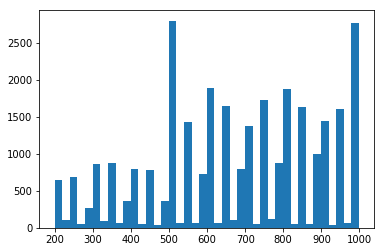

In [40]:
plt.hist(df1.price[df1.price<1000], bins=40)

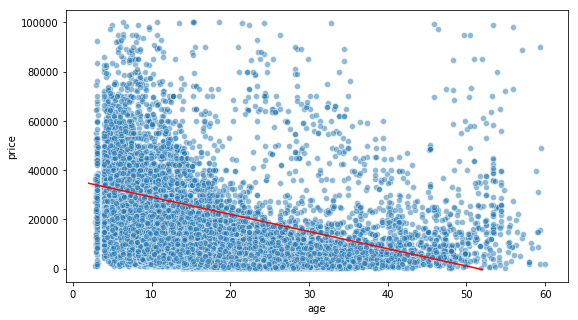

In [355]:
plt.subplots(figsize=(9, 5))
sns.scatterplot(x=df1[(df1.price<=0.01e7)&(df1.age<=60)].age ,y=df1.price[df1.price<=0.01e7],  alpha=0.5,legend='full')
a,b=np.polyfit(df1[df1.price<=0.01e7].age, df1[df1.price<=0.01e7].price, 1)
xx=np.array([0 , 50])
y=a*xx+b
h=sns.lineplot(xx+2, y+17000, color='red')
g.margins(tight=True)
h.margins(tight=True)

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


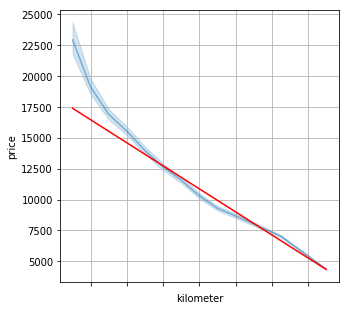

In [84]:
plt.subplots(figsize=(5, 5))
g=sns.lineplot(x=df1[df1.kilometer>=10000].kilometer ,y=df1.price[df1.kilometer>=10000],  alpha=0.5)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.grid(axis='both')
a,b=np.polyfit(df1[df1.price<=0.01e7].kilometer, df1[df1.price<=0.01e7].price, 1)
xx=np.array([10000 , 150000])
y=a*xx+b
h=sns.lineplot(xx, y, color='red')
#g.margins(tight=True)
#h.margins(tight=True)


C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


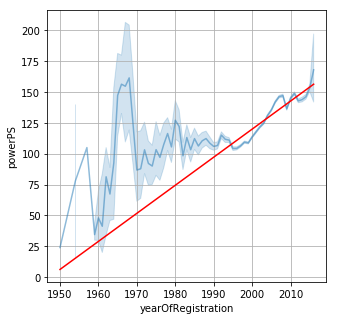

In [319]:
plt.subplots(figsize=(5, 5))
g=sns.lineplot(x=df1[df1.kilometer>=10000].yearOfRegistration ,y=df1.powerPS[df1.kilometer>=10000],  alpha=0.5)
#g.fill_between([1960,1970], 25, 245, facecolor='magenta', alpha = .15, interpolate=True)
#g.set_xticklabels(g.get_xticklabels(), rotation=90)
#g.set_xlabel()
g.grid(axis='both')
a,b=np.polyfit(df1[df1.price<=0.01e7].yearOfRegistration, df1[df1.price<=0.01e7].powerPS, 1)
xx=np.array([1950 , 2016])
y=a*xx+b
h=sns.lineplot(xx, y, color='red')
#g.margins(tight=True)
#h.margins(tight=True)

In [302]:
df1=df1.drop(df1[(df.yearOfRegistration>1960)&(df1.yearOfRegistration<1969)&(df1.brand=='FIAT')&(df1.powerPS>200)].index)
#d1=df1.drop(df1.loc[df1.powerPS==df1[(df.yearOfRegistration>1960)&(df1.yearOfRegistration<1969)].powerPS.max()].index)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [339]:
df1[(df.yearOfRegistration>1950)&(df1.yearOfRegistration<1960)&(df1.powerPS>100)]
#df1[(df.yearOfRegistration>1960)&(df1.yearOfRegistration<1969)&(df1.powerPS>300)]

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,index,dateCrawled,name,seller,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,salvaged,brand,model,age
24310,39071,2016-03-14 04:53:33,MERCEDES BENZ 190 SL UHR RADIO MATCHING NUM...,private,119900,control,cabrio,1957,manuell,105,70000,9,benzin,no,MERCEDES_BENZ,SL,62.58
52756,84619,2016-03-15 18:51:15,VOLKSWAGEN T1,private,57599,control,bus,1959,manuell,110,5000,6,benzin,no,VOLKSWAGEN,TRANSPORTER,60.33


,price
gearbox,
automatik,11539.041974
manuell,5475.193310


<Figure size 432x288 with 0 Axes>

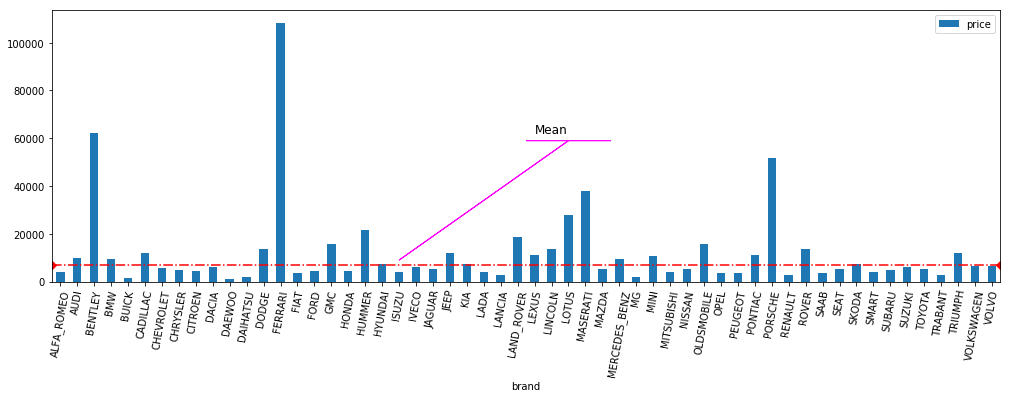

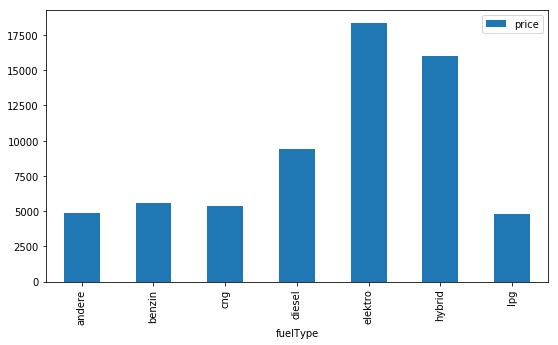

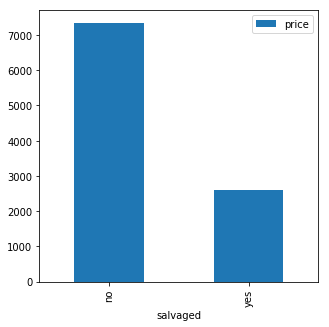

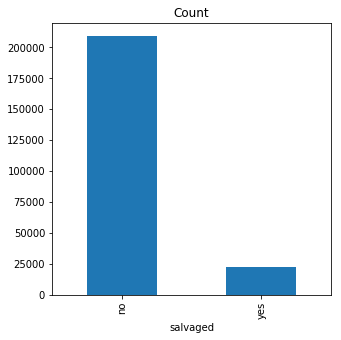

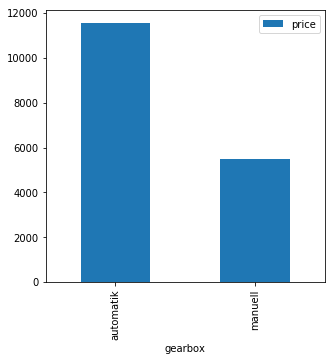

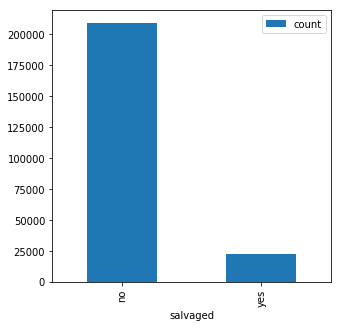

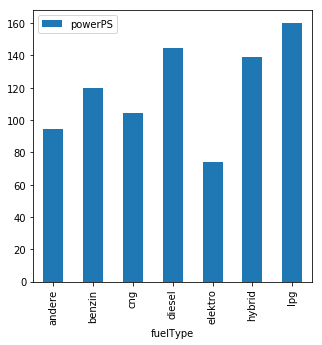

In [352]:
#sns.scatterplot(data=df1.groupby("fuelType").price.mean())
#df1[df1.fuelType=="elektro"]
plt.clf()


s=df1.pivot_table("price","brand", aggfunc="mean").plot(kind='bar', figsize=(17,5),rot=80)
s.axhline(df1.price.mean(), color="red" ,linestyle="-.",label="MEAN",marker="D")
s.arrow(20,9000,10,50000, color='magenta',head_width=5, label='mean')
s.text(28, 62000, "Mean", horizontalalignment='left', 
       size='large', color='black')
df1.pivot_table("price","fuelType", aggfunc="mean").plot(kind='bar', figsize=(9,5))
df1.pivot_table("price","salvaged", aggfunc="mean").plot(kind='bar', figsize=(5,5))
df1.pivot_table("price","salvaged", aggfunc="count").plot(kind='bar', figsize=(5,5), title="Count", legend=False)
df1.pivot_table("price","gearbox", aggfunc="mean").plot(kind='bar', figsize=(5,5))
dfp=df1.pivot_table("price","salvaged", aggfunc="count")
dfp.rename(columns={"price":"count"}, inplace=True)
dfp.plot(kind='bar', figsize=(5,5))
df1.pivot_table("powerPS","fuelType", aggfunc="mean").plot(kind='bar', figsize=(5,5))



df1.pivot_table("price","gearbox", aggfunc="mean")#.plot(kind='bar', figsize=(5,5))

In [351]:
df1[df1.fuelType=='elektro'][df1.powerPS>000][df1.model!="FORTWO"][df1.model!="I3"][df1.powerPS>000].sort_values(by='powerPS',ascending=False)
#df1=df1.drop(df1[df1.fuelType=='elektro'][df1.powerPS>000][df1.model!="FORTWO"][df1.model!="I3"][df1.powerPS>000].index)


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,index,dateCrawled,name,seller,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,salvaged,brand,model,age


C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0,0,'AUDI'),
 Text(0,0,'VOLKSWAGEN'),
 Text(0,0,'SKODA'),
 Text(0,0,'BMW'),
 Text(0,0,'PEUGEOT'),
 Text(0,0,'MAZDA'),
 Text(0,0,'NISSAN'),
 Text(0,0,'RENAULT'),
 Text(0,0,'FORD'),
 Text(0,0,'MERCEDES_BENZ'),
 Text(0,0,'SEAT'),
 Text(0,0,'HONDA'),
 Text(0,0,'FIAT'),
 Text(0,0,'MINI'),
 Text(0,0,'SMART'),
 Text(0,0,'ALFA_ROMEO'),
 Text(0,0,'SUBARU'),
 Text(0,0,'OPEL'),
 Text(0,0,'HYUNDAI'),
 Text(0,0,'MITSUBISHI'),
 Text(0,0,'CITROEN'),
 Text(0,0,'KIA'),
 Text(0,0,'CHEVROLET'),
 Text(0,0,'DACIA'),
 Text(0,0,'DAIHATSU'),
 Text(0,0,'TOYOTA'),
 Text(0,0,'DODGE'),
 Text(0,0,'VOLVO'),
 Text(0,0,'SUZUKI'),
 Text(0,0,'PORSCHE'),
 Text(0,0,'JEEP'),
 Text(0,0,'LANCIA'),
 Text(0,0,'DAEWOO'),
 Text(0,0,'LEXUS'),
 Text(0,0,'CHRYSLER'),
 Text(0,0,'LAND_ROVER'),
 Text(0,0,'JAGUAR'),
 Text(0,0,'CADILLAC'),
 Text(0,0,'FERRARI'),
 Text(0,0,'ROVER'),
 Text(0,0,'LOTUS'),
 Text(0,0,'LADA'),
 Text(0,0,'SAAB'),
 Text(0,0,'TRABANT'),
 Text(0,0,'PONTIAC'),
 Text(0,0,'LINCOLN'),
 Text(0,0,'MASERATI'),
 Tex

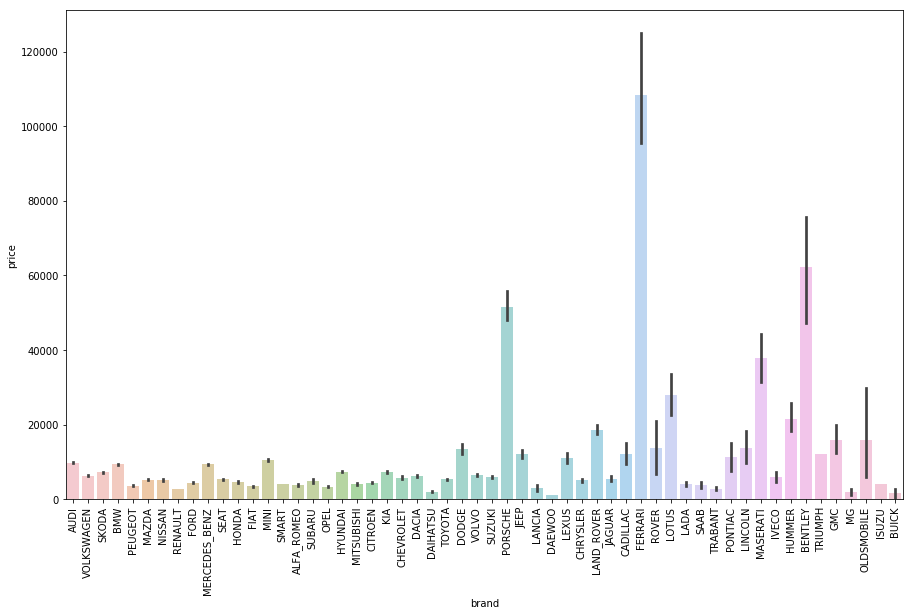

In [65]:
#df=df.drop(df[df.price>9e6].index)
plt.subplots(figsize=(15, 9))
g=sns.barplot(x=df1["brand"], y=df1["price"], data=df1,  alpha=0.5)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
#g.ax_joint.set_yscale('log')
#g.ax_joint.set_xscale('log')
#df=df.drop(df[df.powerPS<30].index)

In [ ]:
np.percentile(df1[df1.brand=='FERRARI'].price, [20,70])

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


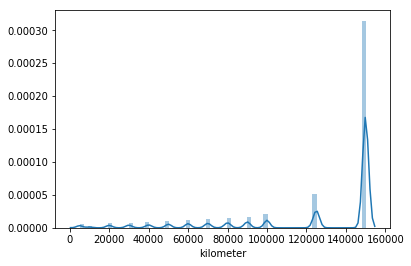

In [158]:
g=sns.distplot(df["kilometer"], bins=70)
#g.invert_xaxis()
#g.set_xticklabels(g.get_xticklabels(), rotation=60)

Text(4999.5,625000,'Erroneous Data')

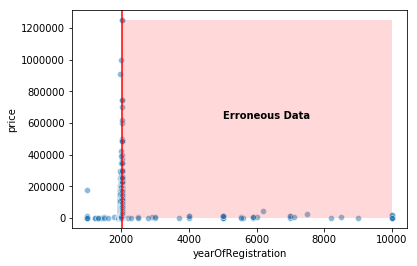

In [33]:
g=sns.scatterplot(x="yearOfRegistration", y="price", data=df,  alpha=0.5)
g.set_autoscalex_on
g.set_autoscaley_on
g.axvline(x=2016, color="red")
g.fill_between([2016,10000], 0, df.price.max(), facecolor='red', alpha = .15, interpolate=True)
g.text(df.yearOfRegistration.max()/2, df.price.max()/2, "Erroneous Data", horizontalalignment='left', size='medium', color='black', weight='semibold')


Text(10000,625000,'Erroneous Data')

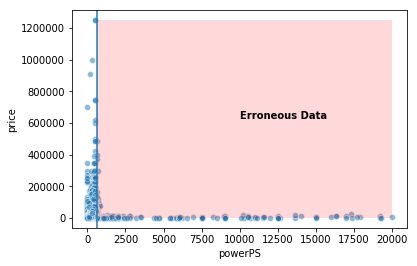

In [34]:
g=sns.scatterplot(x="powerPS", y="price", data=df,  alpha=0.5)
g.set_autoscalex_on
g.set_autoscaley_on
g.axvline(x=600)
g.fill_between([600,20000], 0, df.price.max(), facecolor='red', alpha = .15, interpolate=True)
g.text(df.powerPS.max()/2, df.price.max()/2, "Erroneous Data", horizontalalignment='left', size='medium', color='black', weight='semibold')

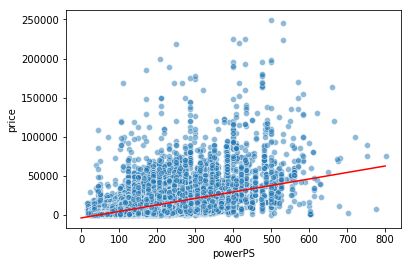

In [242]:
g=sns.scatterplot(x="powerPS", y="price", data=df1[df1.price<250000],  alpha=0.5)
g.set_autoscalex_on
g.set_autoscaley_on
a,b=np.polyfit(df1[df1.price<400000].powerPS, df1[df1.price<400000].price, 1)
xx=np.array([0 , 800])
y=a*xx+b
h=sns.lineplot(xx, y, color='red')


#g.axvline(x=600)
#g.fill_between([600,20000], 0, df.price.max(), facecolor='red', alpha = .15, interpolate=True)
#g.text(df.age.max()/2, df.price.max()/2, "Erroneous Data", horizontalalignment='left', size='medium', color='black', weight='semibold')

In [238]:
df1.powerPS.max()

801

In [353]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat=np.corrcoef(x,y)

    # Return entry [0,1]
    return np.round(corr_mat[0,1],2)

# Compute Pearson correlation coefficient 
r=pearson_r(df1.powerPS, df1.price)

# Print the result
print(r)


0.5


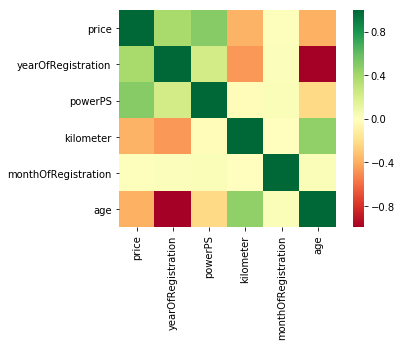

In [368]:
sns.heatmap(df1.drop('index',axis=1).corr(), square=True, cmap='RdYlGn')

In [357]:
df5=df1.head(100)

In [367]:
df5.drop('index',axis=1)

,dateCrawled,name,seller,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,salvaged,brand,model,age
0,2016-03-24 10:58:45,A5 SPORTBACK 2.7 TDI,private,18300,test,coupe,2011,manuell,190,125000,5,diesel,yes,AUDI,A5,8.25
1,2016-03-17 16:54:04,GOLF 4 1 4 3TÜRER,private,1500,test,kleinwagen,2001,manuell,75,150000,6,benzin,no,VOLKSWAGEN,GOLF,18.33
2,2016-03-31 17:25:20,SKODA FABIA 1.4 TDI PD CLASSIC,private,3600,test,kleinwagen,2008,manuell,69,90000,7,diesel,no,SKODA,FABIA,11.42
3,2016-04-04 17:36:23,BMW 316I E36 LIMOUSINE BASTLERFAHRZEUG EX...,private,650,test,limousine,1995,manuell,102,150000,10,benzin,yes,BMW,3ER,24.67
4,2016-04-01 20:48:51,PEUGEOT 206 CC 110 PLATINUM,private,2200,test,cabrio,2004,manuell,109,150000,8,benzin,no,PEUGEOT,2_REIHE,15.50
5,2016-03-26 19:54:18,MAZDA 3 1.6 SPORT,private,2000,control,limousine,2004,manuell,105,150000,12,benzin,no,MAZDA,3_REIHE,15.83
6,2016-04-07 10:06:22,VOLKSWAGEN PASSAT VARIANT 2.0 TDI COMFORTLINE,private,2799,control,kombi,2005,manuell,140,150000,12,diesel,yes,VOLKSWAGEN,PASSAT,14.83
7,2016-03-21 12:57:01,NISSAN NAVARA 2.5DPF SE4X4 KLIMA SITZHEIZG BLU...,private,17999,control,suv,2011,manuell,190,70000,3,diesel,no,NISSAN,NAVARA,8.08
8,2016-03-20 10:25:19,RENAULT TWINGO 1.2 16V AUT.,private,1750,control,kleinwagen,2004,automatik,75,150000,2,benzin,no,RENAULT,TWINGO,15.00
9,2016-03-23 15:48:05,FORD C MAX 2.0 TDCI DPF TITANIUM,private,7550,test,bus,2007,manuell,136,150000,6,diesel,no,FORD,C_MAX,12.33
